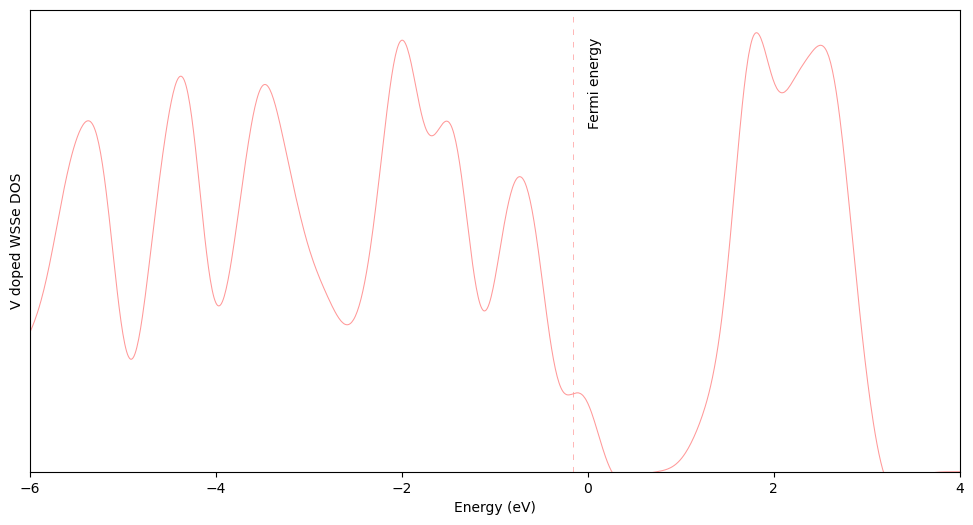

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# load data
energy, dos, idos, additional_data = np.loadtxt('vdoped_dos.dat', unpack=True)

# make plot
plt.figure(figsize=(12, 6))
plt.plot(energy + -0.1565, dos, linewidth=0.75, color='#ff9999')  # Shift x-axis by 2 units
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.ylabel('V doped WSSe DOS')
plt.axvline(x= -0.1565, linewidth=0.5, color='k', linestyle=(0, (8, 10)))  # Shift vertical line by 2
plt.xlim(-6, 4)  # Adjust x-axis limits accordingly
plt.ylim(0, )
plt.fill_between(energy + -0.1565, 0, dos, where=(energy < 0), facecolor='red', alpha=0.25)  # Shift energy values
plt.text(-0.60 + -0.1565, 6, 'Fermi energy', fontsize='medium', rotation=90)  # Shift text position
plt.savefig('vdoped.dos.png', dpi=300, transparent=False)  # Save to a file

plt.show()


In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
def data_loader(fname):
  import numpy as np
  data = np.loadtxt(fname)
  energy = data[:, 0]
  pdos = data[:, 1]  # ldos col, total contribution for a given orbital
  return energy, pdos  # Return both energy and pdos


energy, pdos_d = data_loader('atom_W_tot.dat')
_, pdos_p = data_loader('atom_Se_tot.dat')
_, pdos_s = data_loader('atom_S_tot.dat')
_, pdos_s = data_loader('atom_Re_tot.dat')

# Define background color (similar to the image)
background_color = '#F7F9F9'

# Define the amount to shift the graph leftward (adjust as needed)
shift_value = 0
# Shift the energy data by subtracting the constant value
energy_shifted = energy - shift_value

# make plots
plt.figure(figsize=(8, 4))
plt.figure(figsize=(8, 4), facecolor=background_color)
plt.title("Re-doped-3x3x1-System", fontsize=14)
plt.plot(energy_shifted,pdos_d, linewidth=1.25, color='#000000', label='W')
plt.plot(energy_shifted, pdos_s, linewidth=1.25, color='#006699', label='Se')
plt.plot(energy_shifted, pdos_p, linewidth=1.25, color='#99ff99', label='S')
plt.plot(energy_shifted, pdos_p, linewidth=1.25, color='#ff9999', label='Re')


plt.yticks([])
plt.yticks([0, 5, 10,15,20,25], ["0", "5", "10","15","20","25"])  # Set tick positions and labels
plt.xlabel('Energy (eV)')
plt.ylabel('PDOS(EV^-1)')
plt.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 15)))




# Adjust x-axis limits to accommodate the shift (optional)
# You can comment out this line if you don't want to adjust the limits
plt.xlim(-shift_value, 15 - shift_value)  # Adjust based on your original limits
plt.xlim(-3.5,3.5)
plt.ylim(0, 30)
plt.fill_between(energy_shifted, 0, pdos_s, where=(energy_shifted < 0), facecolor='#000000', alpha=0.25)
plt.fill_between(energy_shifted, 0, pdos_p, where=(energy_shifted < 0), facecolor='#006699', alpha=0.25)
plt.fill_between(energy_shifted, 0, pdos_d, where=(energy_shifted < 0), facecolor='#99ff99', alpha=0.25)
#plt.fill_between(energy_shifted, 0, pdos_d, where=(energy_shifted < 0), facecolor='#ff9999', alpha=0.25)

plt.text(-0.215, 2, 'Fermi energy', fontsize='medium', rotation=90)
plt.legend(frameon=False)
plt.savefig('Re_WSSe_pro.png', dpi=300, transparent=False)  # Save to a file
plt.show()


/tmp/ipykernel_282344/1945266899.py:9: UserWarning: loadtxt: input contained no data: "atom_Se_tot.dat"
  data = np.loadtxt(fname)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

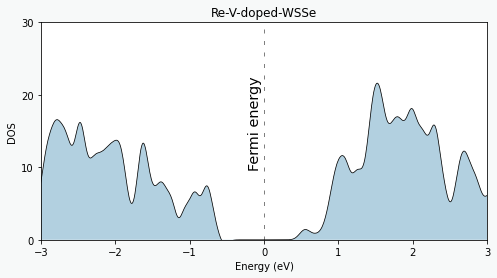

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# Load data function with error handling
def data_loader(fname):
    try:
        # Attempt to load the data
        data = np.loadtxt(fname, unpack=True)
        if data.shape[0] < 3:
            raise ValueError("Not enough columns in the data file.")
        return data[0], data[1], data[2]  # Adjust based on your file structure
    except ValueError as e:
        print("Error loading data:", e)
        return None, None, None  # Return None values if there's an error

# Define Fermi energy value (adjust as needed)
fermi_energy = 0  # Set a value for Fermi energy

# Load data from the file
energy, dos, idos = data_loader('Re_V_dos.dat')

# Check if loading was successful
if energy is None or dos is None:
    print("Data loading failed. Please check your file.")
else:
    # Define the amount to shift the graph leftward (adjust as needed)
    shift_val = -0.0149 
    # Shift the energy data by subtracting the constant value
    energy_shifted = energy - shift_val

    # Define background color (similar to the image)
    background_color = '#F7F9F9'

    plt.figure(figsize=(8, 4), facecolor=background_color)
    plt.plot(energy_shifted, dos, linewidth=0.75, color='#000000')
    plt.title("Re-V-doped-WSSe", fontsize=12, y=1.0)  # Adjust y-position as needed

    # Make plot
    plt.yticks([])
    plt.yticks([0, 10, 20, 30, 40], ["0", "10", "20", "30", '40'])  # Set tick positions and labels
    plt.xlabel('Energy (eV)')
    plt.ylabel('DOS')
    plt.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 15)))

    # Adjust x-axis limits to accommodate the shift
    plt.xlim(energy_shifted.min(), energy_shifted.max())  # Automatic limits based on shifted data

    # Fill all shapes with a specific color
    plt.fill_between(energy_shifted, 0, dos, facecolor='#006699', alpha=0.3)

    # Update Fermi energy text position based on the shift
    fermi_energy_text_position = fermi_energy   # Adjust position as needed
    plt.xlim(-shift_val, 15 - shift_val)
    plt.xlim(-3, 3)
    plt.ylim(0, 30)
    plt.text(-0.215, 10, 'Fermi energy', fontsize='x-large', rotation=90)

    # Save to a file
    plt.savefig('Re,V.dos.png', dpi=300, transparent=False)  
    plt.show()